<a href="https://colab.research.google.com/github/Sivateja-Varma/mycodes.py/blob/main/Insurance_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
print(df.sex.value_counts())
print(df.children.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [15]:
df = df.replace({'sex':{'male':0,'female':1},'smoker':{'no':0,'yes':1},'region':{'southeast':0,'southwest':1,'northwest':3,'northeast':2,}})

<ipython-input-15-730e09fb96b5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'sex':{'male':0,'female':1},'smoker':{'no':0,'yes':1},'region':{'southeast':0,'southwest':1,'northwest':3,'northeast':2,}})


<ipython-input-16-8a5f5bec54a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

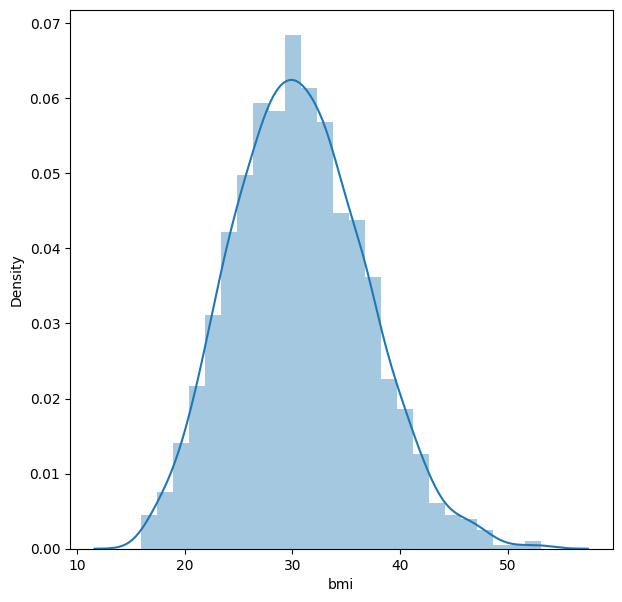

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(df['bmi'])

In [17]:
X = df.drop(columns='charges',axis=1)
Y = df['charges']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

Y = MX + C

In [28]:
reg_prediction = reg.predict(X_test)
accuracy_score = metrics.r2_score(Y_test, reg_prediction)
print(accuracy_score)


0.7447273869684076


In [29]:
Y_test = list(Y_test)

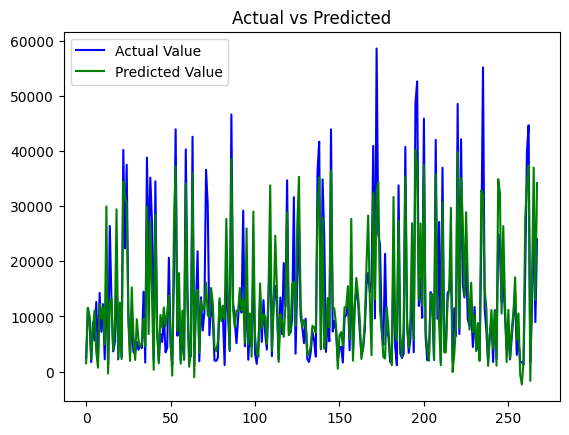

In [32]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(reg_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()